### Текстовое описание набора данных

Набор данных включает записи о лесных пожарах в США, вызванных молнией, за 24 года с 1992 по 2015. Атрибуты исходного набора данных включают год возникновения пожара, дату пожара, время обнаружения, причину пожара, дни на тушение пожара, время локализации, размер пожара, класс пожара, широту, долготу, штат, код FIPS и название FIPS. Что касается атрибута класса пожара, то, согласно Национальной координационной группе по борьбе с лесными пожарами (2023), пожары делятся на семь классов в зависимости от количества сожженных акров, а именно: Класс A (0-0,25), Класс B (0,26-9,9), Класс C (10-99,9), Класс D (100-299), Класс E (300-999), Класс F (1 000-4 999) и Класс G (5 000+).

### Подготовка и очистка данных

In [3]:
# Импортирование библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 
sns.set(style="ticks")
import os

In [4]:
# Читаем файл
fires = pd.read_csv("data/dataset_with_forest_fires.csv")

In [3]:
# Выводим названия столбцов
list(fires)

['Unnamed: 0',
 'index',
 'FIRE_YEAR',
 'Fire_Date',
 'DISCOVERY_TIME',
 'STAT_CAUSE_DESCR',
 'Days_to_extinguish_fire',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'STATE',
 'FIPS_CODE',
 'FIPS_NAME']

In [4]:
# Посмотриим на первые 5 строк
fires.head()

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [5]:
# Выведем форму данных
fires.shape

(278468, 15)

In [6]:
# выведем подсчет уникальных значений, чтобы проверить количество для штата, класса и года
fires.nunique()

Unnamed: 0                 278468
index                      278468
FIRE_YEAR                      24
Fire_Date                    6788
DISCOVERY_TIME               1433
STAT_CAUSE_DESCR                1
Days_to_extinguish_fire       210
CONT_TIME                    1402
FIRE_SIZE                    7713
FIRE_SIZE_CLASS                 7
LATITUDE                   149490
LONGITUDE                  163138
STATE                          51
FIPS_CODE                     270
FIPS_NAME                    1349
dtype: int64

! Похоже на правду, что существует 7 классов пожаров (класс A-G) и 24 разных года (1992-2015), но вот если загуглить число штатов, то их всего 50, а не 51.

In [7]:
# Если погуглить DC и PR не относятся к почтовым сокращениям штатов.
fires['STATE'].unique()

array(['CA', 'NM', 'WY', 'CO', 'OR', 'WA', 'UT', 'AZ', 'NV', 'SD', 'TX',
       'ID', 'MT', 'MN', 'LA', 'NE', 'OK', 'AR', 'FL', 'KY', 'MI', 'VA',
       'WV', 'WI', 'NC', 'SC', 'AL', 'MS', 'GA', 'ND', 'TN', 'IL', 'KS',
       'MO', 'NH', 'OH', 'AK', 'IN', 'PA', 'VT', 'ME', 'NY', 'MD', 'NJ',
       'HI', 'MA', 'IA', 'PR', 'DE', 'DC', 'CT'], dtype=object)

In [8]:
# Проверим количество записей
fires[(fires["STATE"] == "DC") | (fires["STATE"] == "PR") ]

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
160423,160423,372354,2007,07-03-2007,1430.0,Lightning,0.0,1900.0,6.0,B,18.020278,-67.158333,PR,NaN,NaN
214378,214378,1219330,2010,07-17-2010,700.0,Lightning,0.0,730.0,0.1,A,38.952200,-77.050000,DC,NaN,NaN
245472,245472,1583117,2012,09-18-2012,NaN,Lightning,0.0,NaN,1.0,B,17.980278,-67.170278,PR,NaN,NaN


In [9]:
# Удаляем неправдивую информацию
fires.drop([160423,214378,245472],axis=0,inplace=True)

In [10]:
# Удалим информацию, которая пока не нужна для анализа
fires = fires.drop(['Unnamed: 0', 'index', 'STAT_CAUSE_DESCR', 'FIPS_CODE', 'FIPS_NAME', 'CONT_TIME'], axis = 1)

In [11]:
fires.head()

,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2004,05-12-2004,845.0,0.0,0.25,A,38.933056,-120.404444,CA
1,2004,06-28-2004,1600.0,5.0,0.10,A,38.559167,-119.913333,CA
2,2004,06-28-2004,1600.0,5.0,0.10,A,38.559167,-119.933056,CA
3,2004,06-30-2004,1800.0,1.0,0.10,A,38.635278,-120.103611,CA
4,2004,07-01-2004,1800.0,1.0,0.10,A,38.688333,-120.153333,CA


In [12]:
# Переименуем столбцы
fires.columns = ["year", "date", "discovery_time", "days_extinguished", "size", "class", "latitude", "longitude", "state"]

In [13]:
# Выведем описание для определения какой нибудь тенденции и потенциальных отклонений
fires.describe()

,year,discovery_time,days_extinguished,size,latitude,longitude
count,278465.000000,228270.000000,227873.000000,278465.000000,278465.00000,278465.000000
mean,2003.264141,1454.016752,2.919016,312.547336,39.40346,-108.226712
std,6.642186,397.502103,11.453995,5759.180411,6.42492,14.319640
min,1992.000000,0.000000,-210.000000,0.000100,19.12170,-170.369400
25%,1998.000000,1210.000000,0.000000,0.100000,34.63330,-117.578270
50%,2003.000000,1510.000000,0.000000,0.200000,39.49160,-111.470000
75%,2009.000000,1730.000000,1.000000,2.000000,44.03310,-105.056210
max,2015.000000,2359.000000,278.000000,606945.000000,70.13810,-67.199996


! В столбце days_extinguished, которое указывает на количество дней, которое понадобилось для тушения пожара, есть отрицательное значение, что быть не может. Заметна огромная большая площадь пожара, но она имеет место быть из-за распространения огня.

In [14]:
# Отрицательные дни исправили
fires['days_extinguished'] = fires['days_extinguished'].abs()

In [15]:
# Определяем отсутствующие значения и определяем их сумму
fires.isna().sum()

year                     0
date                     0
discovery_time       50195
days_extinguished    50592
size                     0
class                    0
latitude                 0
longitude                0
state                    0
dtype: int64

Отсутствующие значения: только один столбец: days_extinguished

In [16]:
# Выведем меру асимметрии распределения данных относительно их среднего значения
fires['days_extinguished'].skew()

7.593745013859997

In [17]:
fires['discovery_time'].skew()

-0.5767312165704653

Получается сильное правоскошенное значение для 'days_extinguished', то есть в данном случае высокое положительное значение асимметрии, как 7.59 в данном случае, указывает на то, что распределение данных о количестве дней, затраченных на тушение пожаров, имеет сильное смещение вправо, что означает, что есть небольшое количество дней с очень высокими значениями дней тушения пожаров, в то время как большинство дней имеют меньшие значения.
Для 'discovery_time' значение немного левоскошенное, это означает, что большинство пожаров обнаруживаются относительно рано после начала возгорания, то есть больше низких значений времени, что хорошо.

In [18]:
# Устраняем недостающие значения с помощью замены медианой
d = round(fires['days_extinguished'].median())
fires['days_extinguished'].fillna(d,inplace=True)
c = round(fires['discovery_time'].median())
fires['discovery_time'].fillna(c,inplace=True)

In [19]:
# Проверим пропущенные
fires.isna().sum()

year                 0
date                 0
discovery_time       0
days_extinguished    0
size                 0
class                0
latitude             0
longitude            0
state                0
dtype: int64

In [20]:
# Проверим значения типов данных
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278465 entries, 0 to 278467
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               278465 non-null  int64  
 1   date               278465 non-null  object 
 2   discovery_time     278465 non-null  float64
 3   days_extinguished  278465 non-null  float64
 4   size               278465 non-null  float64
 5   class              278465 non-null  object 
 6   latitude           278465 non-null  float64
 7   longitude          278465 non-null  float64
 8   state              278465 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 21.2+ MB


In [21]:
# Преобразуем даты из строки в тип datetime
fires['date'] = fires['date'].astype('datetime64[ns]')

In [22]:
# Добавим новый столбец для извлечения месяца из даты
fires['month'] = fires['date'].dt.month_name().str.slice(stop=3)

In [23]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278465 entries, 0 to 278467
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   year               278465 non-null  int64         
 1   date               278465 non-null  datetime64[ns]
 2   discovery_time     278465 non-null  float64       
 3   days_extinguished  278465 non-null  float64       
 4   size               278465 non-null  float64       
 5   class              278465 non-null  object        
 6   latitude           278465 non-null  float64       
 7   longitude          278465 non-null  float64       
 8   state              278465 non-null  object        
 9   month              278465 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 23.4+ MB


Получаем хорошие данные для работы: 5 float64, 1 int64, 3 object и 1 datetime64.

In [24]:
fires.head()

,year,date,discovery_time,days_extinguished,size,class,latitude,longitude,state,month
0,2004,2004-05-12,845.0,0.0,0.25,A,38.933056,-120.404444,CA,May
1,2004,2004-06-28,1600.0,5.0,0.10,A,38.559167,-119.913333,CA,Jun
2,2004,2004-06-28,1600.0,5.0,0.10,A,38.559167,-119.933056,CA,Jun
3,2004,2004-06-30,1800.0,1.0,0.10,A,38.635278,-120.103611,CA,Jun
4,2004,2004-07-01,1800.0,1.0,0.10,A,38.688333,-120.153333,CA,Jul


### Разведочный анализ данных

In [26]:
# Статистическая сводка очищенного набора данных
fires.describe()

,year,date,discovery_time,days_extinguished,size,latitude,longitude
count,278465.000000,278465,278465.000000,278465.000000,278465.000000,278465.00000,278465.000000
mean,2003.264141,2003-10-26 03:40:40.874077824,1464.108071,2.395666,312.547336,39.40346,-108.226712
min,1992.000000,1992-01-01 00:00:00,0.000000,0.000000,0.000100,19.12170,-170.369400
25%,1998.000000,1998-07-23 00:00:00,1300.000000,0.000000,0.100000,34.63330,-117.578270
50%,2003.000000,2003-08-07 00:00:00,1510.000000,0.000000,0.200000,39.49160,-111.470000
75%,2009.000000,2009-06-11 00:00:00,1700.000000,1.000000,2.000000,44.03310,-105.056210
max,2015.000000,2015-12-26 00:00:00,2359.000000,278.000000,606945.000000,70.13810,-67.199996
std,6.642186,NaN,360.539939,10.420738,5759.180411,6.42492,14.319640


Среднее количество дней на тушение пожара составляет 2,4 дня. Средний размер пожара составляет 313 акров.

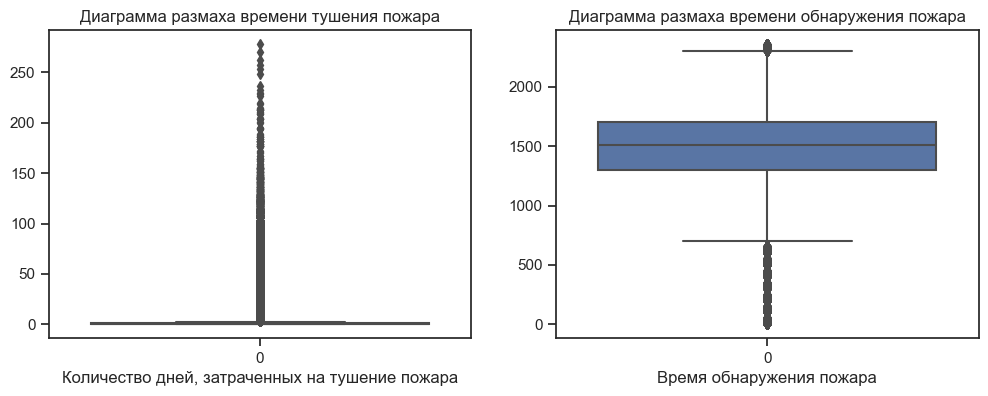

In [27]:
fig = plt.figure(figsize=(12, 4))
axes = fig.subplots(1, 2)
sns.boxplot(fires['days_extinguished'], ax=axes[0])
axes[0].set_xlabel('Количество дней, затраченных на тушение пожара')
axes[0].title.set_text(f"Диаграмма размаха времени тушения пожара")
sns.boxplot(fires['discovery_time'], ax=axes[1])
axes[1].set_xlabel('Время обнаружения пожара')
axes[1].title.set_text(f"Диаграмма размаха времени обнаружения пожара")
plt.show();

В целом, нулевые значения уже были исправлены, когда писал выше про меру асимметрии распределения данных относительно их среднего значения.

### Пожары по классам и размерам

In [28]:
fires.nlargest(3, 'size')

,year,date,discovery_time,days_extinguished,size,class,latitude,longitude,state,month
100533,1997,1997-06-25,1841.0,76.0,606945.0,G,61.982700,-157.085700,AK,Jun
244323,2012,2012-07-08,1800.0,22.0,558198.3,G,42.391894,-117.893687,OR,Jul
128967,2004,2004-06-13,1345.0,109.0,537627.0,G,65.266300,-146.885800,AK,Jun


Три самых крупных пожара, зафиксированных в наборе данных, происходят в штатах Аляска и Орегон.
Акр — неметрическая земельная мера, применяемая в ряде стран с английской системой мер: в Великобритании, США, Канаде, Австралии и почти во всех странах бывшей Британской Империи.

1 акр равен 4046,86 м² ≈ 0,004 км²

In [29]:
# Средние значения для каждого числового признака в наборе данных по классам.
fireclass = fires.groupby('class').agg({'days_extinguished': 'mean', 'size': 'mean'}).reset_index()
fireclass

,class,days_extinguished,size
0,A,1.319131,0.112512
1,B,1.655291,2.027546
2,C,3.291552,31.874076
3,D,6.893296,168.067111
4,E,11.463295,535.019664
5,F,19.225881,2262.685956
6,G,36.562629,30991.156570


В среднем пожары класса "А" тушатся меньше - 1,3 дня, чем пожары класса "G" - 36,5 дня. Средний размер пожара каждого класса выглядит следующим образом: A - 0,11, B - 2, C - 32, D - 168, E - 535, F - 2 263 и G - 30 991 арков.

In [30]:
# Напишем функцию, которая будет строить стобчатую диаграмму среднего признака от другого признака
def my_barplot(arg_fires, feature_name_x, feature_name_y, x_label, y_label, title, figsiz, hue_feature=None, legend_title=None):
    plt.figure(figsize=figsiz)
    if hue_feature:
        my_plot = sns.barplot(x=arg_fires[feature_name_x], y=arg_fires[feature_name_y], saturation=1, hue=fires[hue_feature])
        my_plot.legend(title=legend_title);
    else:
        order = arg_fires.groupby(feature_name_x)[feature_name_y].mean().sort_values(ascending=False).index
        sns.barplot(x=arg_fires[feature_name_x], y=arg_fires[feature_name_y], order=order, palette='RdYlGn', saturation=1)
    plt.title(title)
    plt.ylabel(y_label);
    plt.xlabel(x_label)

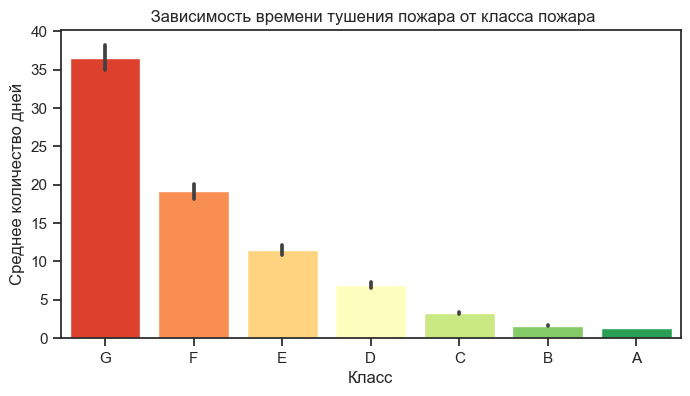

In [31]:
my_barplot(fires, 'class', 'days_extinguished', "Класс", "Среднее количество дней", " Зависимость времени тушения пожара от класса пожара", (8, 4))

По графику заметно, что по мере увеличения размера пожара по классификации от A до G на его тушение уходит все больше времени.

In [32]:
# Выведем описание данных для столбцов с типом данных "object".
fires.describe(include='O')

,class,state,month
count,278465,278465,278465
unique,7,49,12
top,A,OR,Jul
freq,152395,31556,90663


Чаще всего возникают пожары класса "А" - 152 395, что составляет 55 % всех пожаров. Штат с наибольшим общим количеством пожаров - Орегон - 31 556, что составляет 11 %. В июле произошло наибольшее количество пожаров - 90 663, что составляет 33 % всех пожаров.

In [33]:
# Подсчет количества пожаров по классам
classcounts = fires['class'].value_counts()
classcounts

class
A    152395
B     85800
C     24325
D      5773
E      4291
F      3462
G      2419
Name: count, dtype: int64

In [34]:
# Нам понадобится функция, которая добавляет метки с процентными значениями к столбцам или строкам на графике
def show_marks(ax, arg_fires, percent=False, vert=False):
    if vert:
        ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
    else:
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

    for i, bar in enumerate(ax.patches):
        if vert:
            h = bar.get_width()
            ax.text(h+ax.get_xlim()[1]*0.055, i, f'{round(h * (100 / arg_fires.shape[0] if percent else 1), 2)}' + ('%' if percent else ''),
                    ha='center', va='center')
        else:
            h = bar.get_height()
            ax.text(i, h+ax.get_ylim()[1]*0.04, f'{round(h * (100 / arg_fires.shape[0] if percent else 1), 2)}' + ('%' if percent else ''),
                    ha='center', va='center')

# А так же функция, которая создает гистограмму или график подсчета значений определенного признака
def my_countplot(arg_fires, feature, figsize, title, xlabel, ylabel, vert=False, sort=False, mark_percent=False):
    fig = plt.figure(figsize=figsize)
    order = (arg_fires[feature].value_counts().index if sort else None)
    plot = sns.countplot(y=arg_fires[feature] if vert else None, x=None if vert else arg_fires[feature], order=order, palette='colorblind')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if mark_percent:
        show_marks(plot.axes, arg_fires, True, vert)
    plt.show();

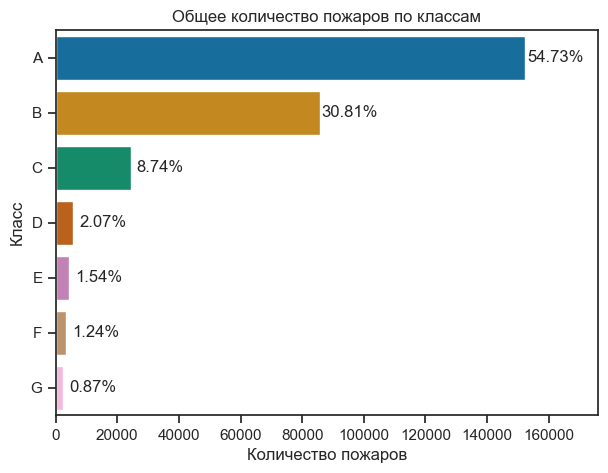

In [35]:
my_countplot(fires, 'class', (7, 5), "Общее количество пожаров по классам",
                                   "Количество пожаров", "Класс", vert=True, sort=True, mark_percent=True)

На класс "А" приходится около 54,73%, B - 30,81%, C - 8,74%, D - 2,07%, E - 1,54%, F - 1,24% и G - 0,87% всех пожаров.
Так же не менее наглядно будет выглядеть в виде круговой диаграммы.

### Пожары по штатам

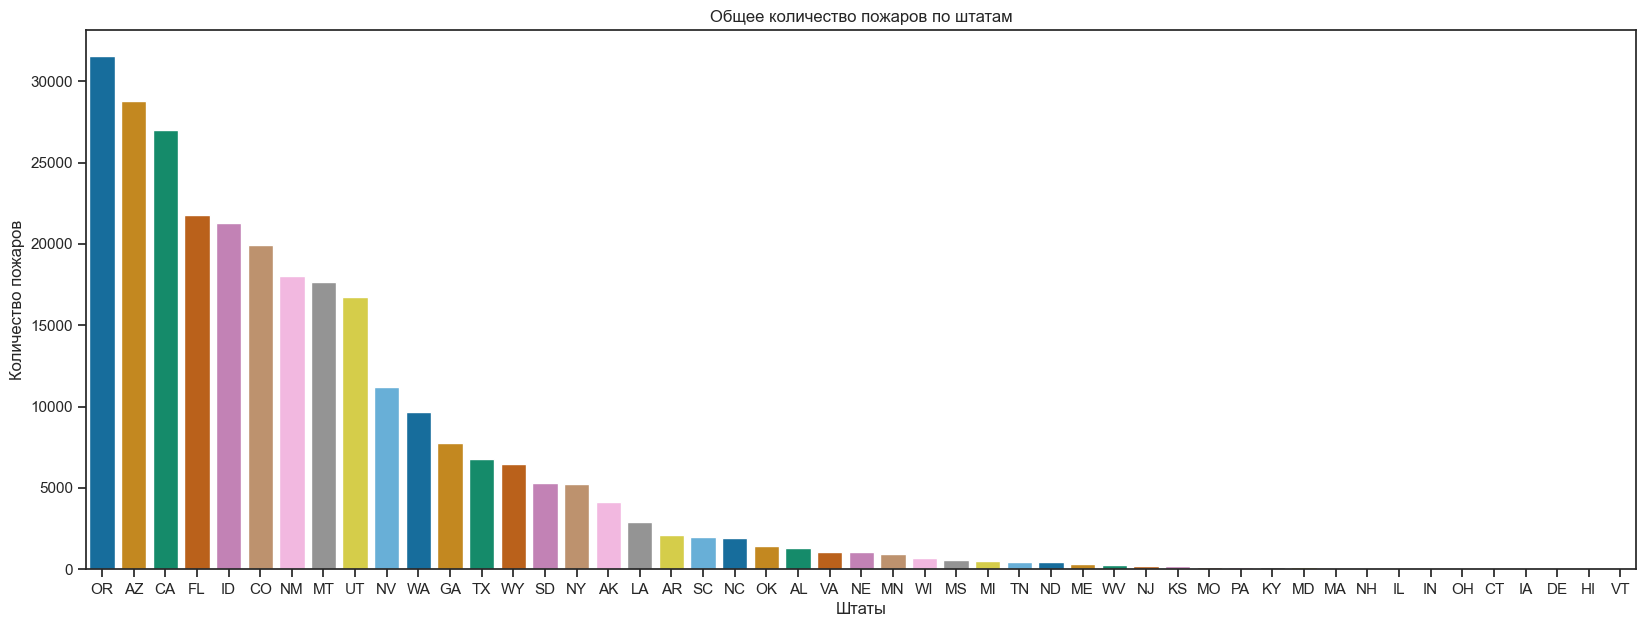

In [36]:
my_countplot(fires, 'state', (20, 7), "Общее количество пожаров по штатам",
                                    "Штаты", "Количество пожаров", vert=False, sort=True, mark_percent=False)

In [37]:
top3states = fires['state'].value_counts().head(3)
top3states / fires['state'].value_counts().sum() * 100

state
OR    11.332124
AZ    10.333794
CA     9.696012
Name: count, dtype: float64

В тройку штатов с наибольшим количеством пожаров входят Орегон (11%), Аризона (10%) и Калифорния (10%).

In [38]:
bottom3states = fires['state'].value_counts().tail(3)
bottom3states

state
DE    10
HI     9
VT     9
Name: count, dtype: int64

Три штата с наименьшим количеством пожаров, вызванных молниями, - это Делавэр, Гавайи и Вермонт.

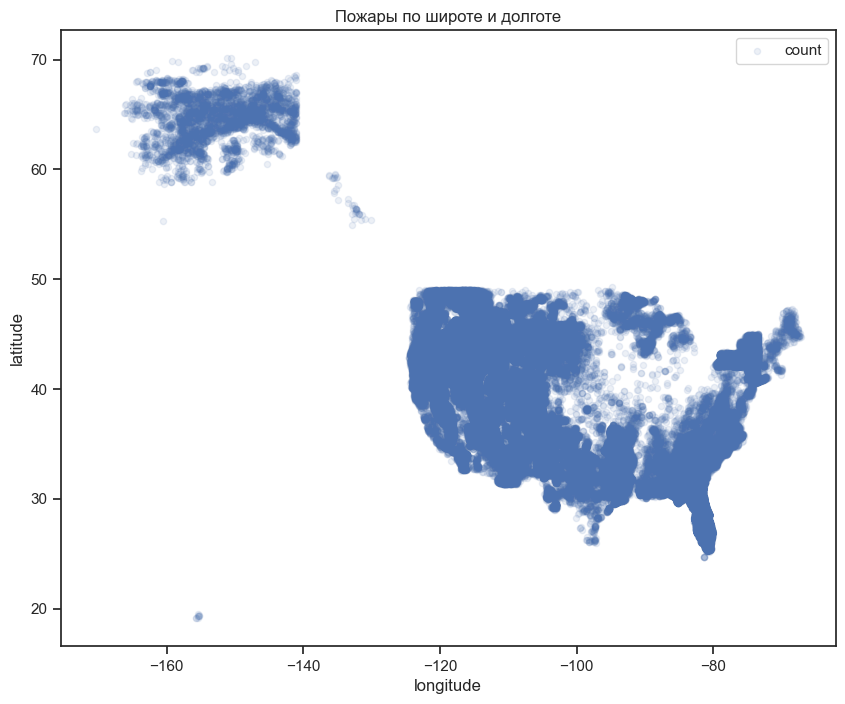

In [39]:
# Пожары, нанесенные на карту по широте и долготе
fires.plot(kind='scatter', x='longitude', y='latitude',
       label = 'count', alpha=0.1, figsize=(10,8))
plt.title("Пожары по широте и долготе")
plt.legend()

На среднем западе и востоке меньше пожаров по сравнению с крайним западом, особенно, где Флорида, Орегона, Аляска, Нью-Йорк и др.

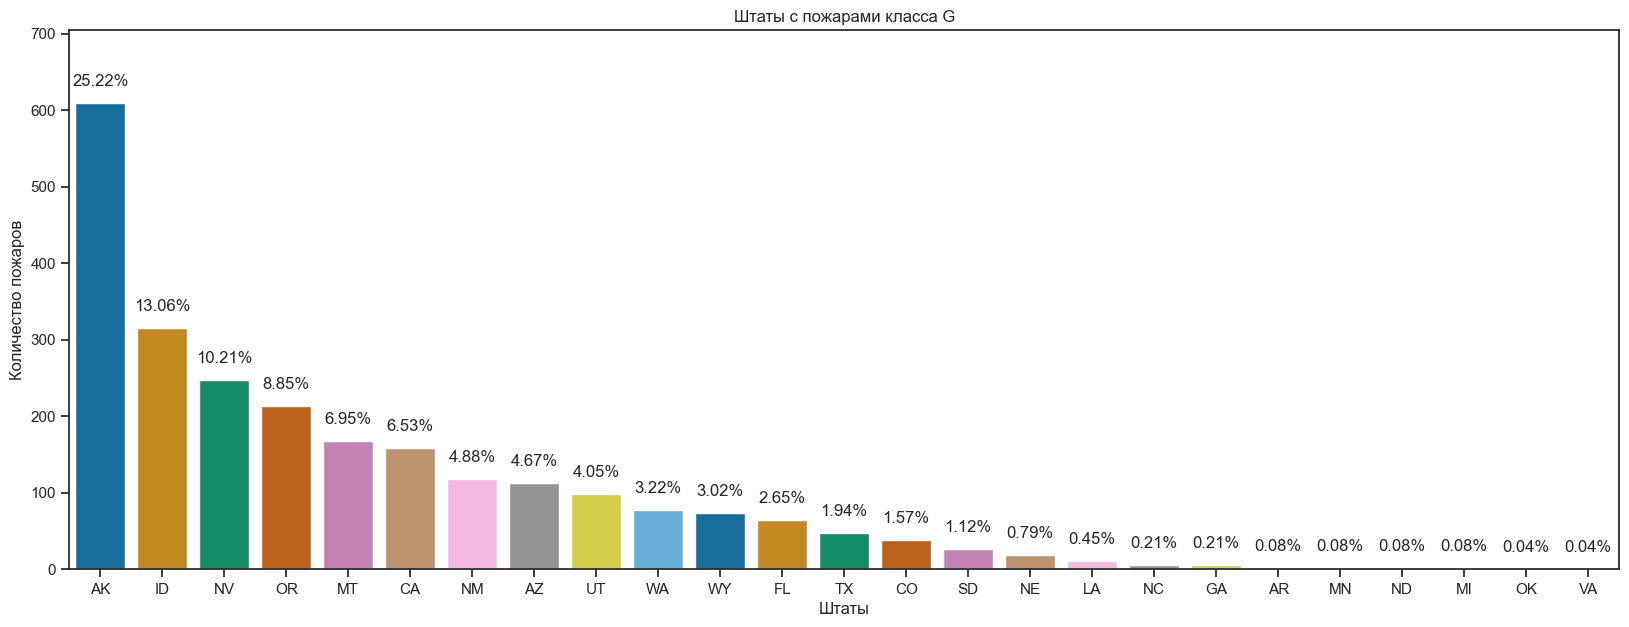

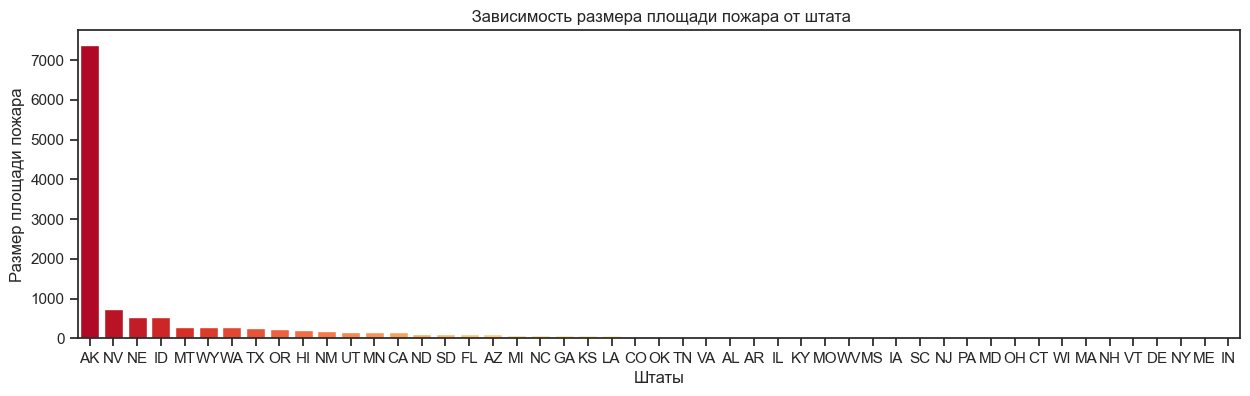

In [40]:
gfires = fires[fires["class"] == "G" ].reset_index()
my_countplot(gfires, 'state', (20, 7), "Штаты с пожарами класса G",
                                    "Штаты", "Количество пожаров", vert=False, sort=True, mark_percent=True)
states = fires.groupby('state').agg({'size': 'mean'}).reset_index()
my_barplot(states, 'state', 'size', "Штаты", "Размер площади пожара", " Зависимость размера площади пожара от штата", (15, 4))

In [41]:
gfires[gfires['state'] == 'AK'].shape

(610, 11)

На Аляску приходится 25 % всех пожаров класса G. На приведенном выше графике видно, что здесь происходит больше пожаров класса G по сравнению с другими штатами. Ни один другой штат не приближается к числу 610 пожаров класса G.
По рисунку выше видно, что больше всего площади было затронуто пожаром в AK(Аляске)

### Пожары по дням, месяцам и годам

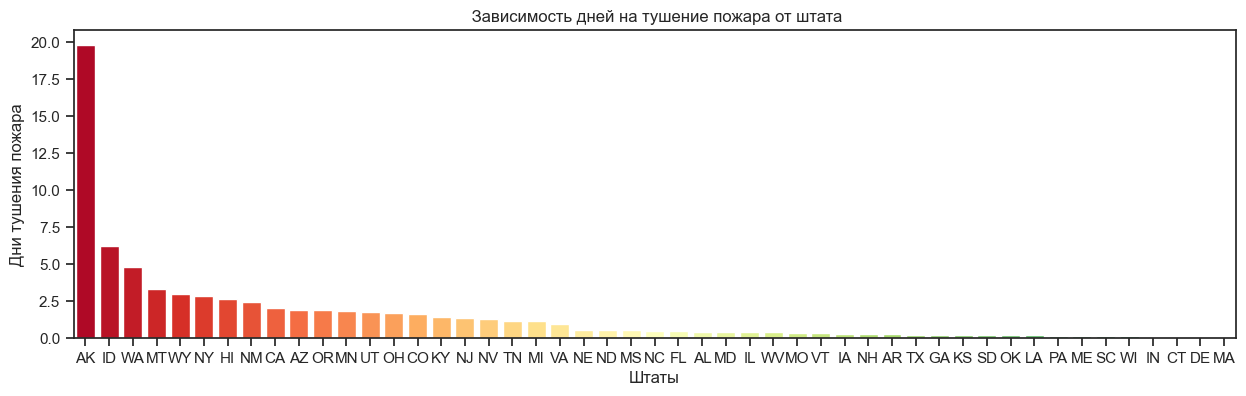

In [42]:
states = fires.groupby('state').agg({'days_extinguished': 'mean'}).reset_index()
my_barplot(states, 'state', 'days_extinguished', "Штаты", "Дни тушения пожара", " Зависимость дней на тушение пожара от штата", (15, 4))

На тушение пожаров на Аляске в среднем уходит больше всего времени - более 20 дней, что вполне логично, поскольку на Аляска самая большая площадь пожаров.

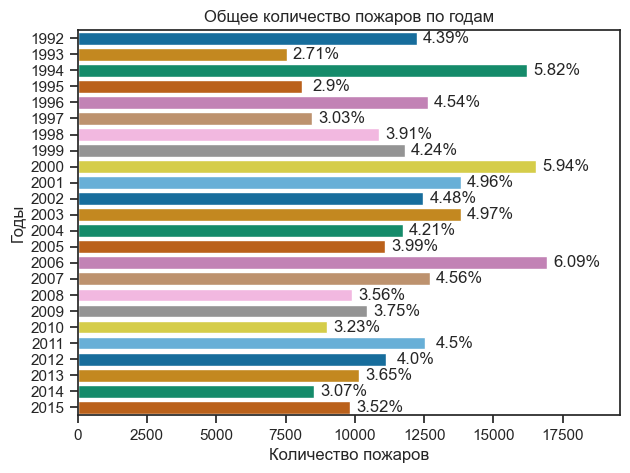

In [43]:
my_countplot(fires, 'year', (7, 5), "Общее количество пожаров по годам",
                                   "Количество пожаров", "Годы", vert=True, sort=False, mark_percent=True)

В 2006 году произошло больше всего пожаров, а в 1993 году - меньше всего

In [44]:
# Средние значения пожаров между самым ранним и самым последним годом в наборе данных.
y92_15 = fires.groupby('year').agg({'days_extinguished':'mean', 'size':'mean'}).reset_index()
y92_15[(y92_15.year == 1992) | (y92_15.year == 2015)]

,year,days_extinguished,size
0,1992,1.133688,82.348331
23,2015,4.588361,835.558949


С 1992 по 2015 год средний размер пожаров значительно увеличился - с 82 акров до 836 акров. С увеличением размеров пожаров увеличилось и среднее время их тушения - с 1,13 до 4,58 дня.

Text(0, 0.5, 'Размер пожара')

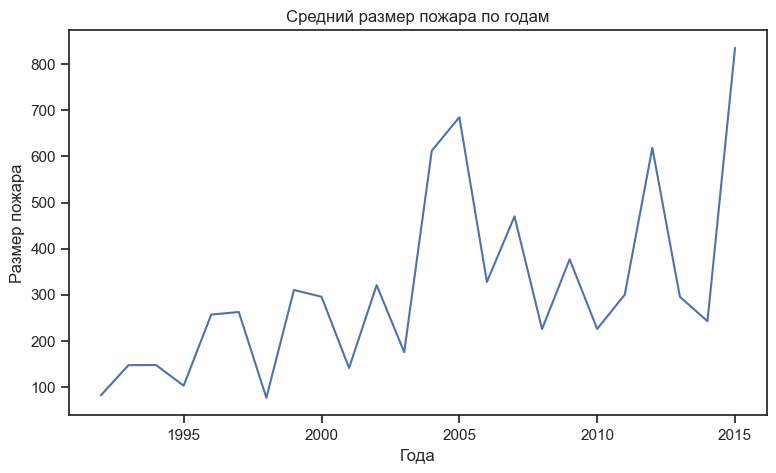

In [45]:
yrsfire = fires.groupby('year').agg({'size':'mean'}).reset_index()
plt.figure(figsize=(9,5))
sns.lineplot(x = 'year', y = 'size', data = yrsfire)
plt.title ("Средний размер пожара по годам")
plt.xlabel("Года")
plt.ylabel("Размер пожара")

За последние годы наблюдается общее увеличение среднего размера пожаров.

Text(0, 0.5, 'Размер пожара')

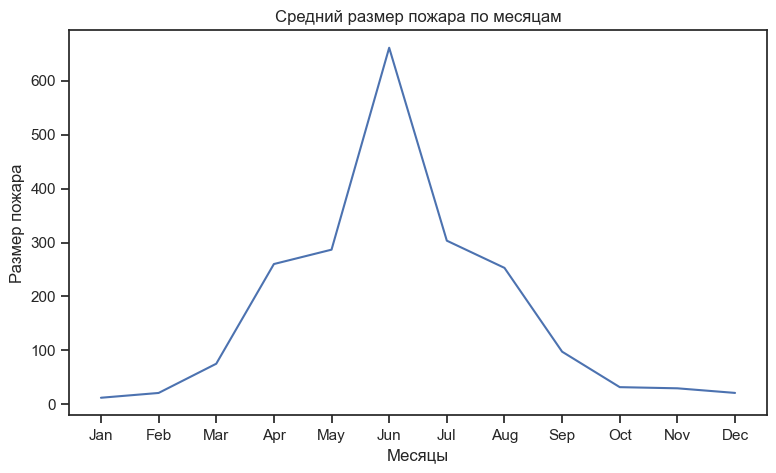

In [46]:
# Сгруппируем по среднему значению месяца
months = fires.groupby('month').agg({'size':'mean'}).reset_index()
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
monthfire = months.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.figure(figsize=(9,5))
sns.lineplot(x = 'month', y = 'size', data = monthfire)
plt.title ("Средний размер пожара по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Размер пожара")

Большинство крупных пожаров происходит летом. Самые маленькие пожары происходят зимой.

### Корреляция

Text(0, 0.5, 'Размер пожара')

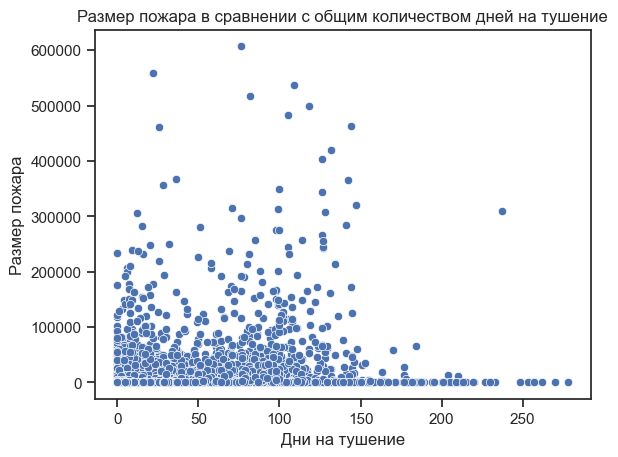

In [47]:
# Диаграмма рассеяния корреляции между размером пожара и общим количеством дней на его тушение
plt.title ("Размер пожара в сравнении с общим количеством дней на тушение")
sns.scatterplot(x='days_extinguished', y='size', data = fires)
plt.xlabel("Дни на тушение")
plt.ylabel("Размер пожара")

In [48]:
fires_for_corr = fires.drop(['date', 'class', 'state', 'state', 'month'], axis = 1)
fires_for_corr.head()

,year,discovery_time,days_extinguished,size,latitude,longitude
0,2004,845.0,0.0,0.25,38.933056,-120.404444
1,2004,1600.0,5.0,0.10,38.559167,-119.913333
2,2004,1600.0,5.0,0.10,38.559167,-119.933056
3,2004,1800.0,1.0,0.10,38.635278,-120.103611
4,2004,1800.0,1.0,0.10,38.688333,-120.153333


<Axes: title={'center': 'Пожары: Корреляция признаков'}>

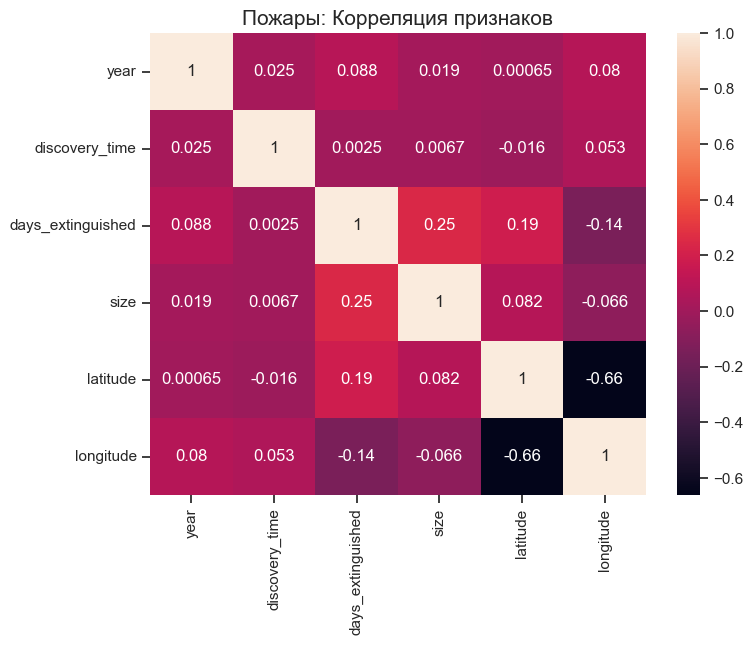

In [49]:
# Тепловая карта корреляции данных о пожарах
corr = fires_for_corr.corr()
plt.figure(figsize=(8,6))
plt.title('Пожары: Корреляция признаков', y=1, size=15)
sns.heatmap(corr, annot=True)

Существует небольшая положительная корреляция в 0,25 между размером пожара и количеством дней на его тушение. Другими словами, чем больше пожар, тем больше времени требуется на его тушение. Широта и долгота также коррелируют с количеством дней, потраченных на тушение пожара, но они имеют мультилинейность друг с другом.

## Основные выводы

Выявление тенденций по различным признакам пожаров имеет важное значение для управления пожарами, их локализации и распределения капитальных и людских ресурсов по всей территории Соединенных Штатов. В результате детального анализа данных были получены следующие основные выводы.

* На запад США, а именно на Орегон, Аризону и Калифорнию, приходится 1/3 всех пожаров.
* Наиболее распространенным типом пожаров является класс А, на который приходится половина всех пожаров в наборе данных.
* Больше всего пожаров происходит летом, а меньше всего - зимой. Та же тенденция прослеживается и в отношении размера пожара: самые крупные пожары происходят летом, а самые мелкие - зимой.
* На Аляске происходит непропорционально большое количество пожаров класса G по сравнению с другими штатами.
* Средний размер пожаров значительно увеличился с течением времени c 1992 по 2015.
* В среднем, чем больше класс пожара, тем больше времени требуется на его тушение.
